In [257]:
#pip install category_encoders


# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder
#for scalling data
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,ComplementNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm,datasets
from sklearn.svm import OneClassSVM,SVC,LinearSVC
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV


# Read Dataset

In [3]:
nv = ['N/a', 'n/a', '', np.nan]
train_data = pd.read_csv(r"D:\ML project\train.csv", na_values = nv)
test_data= pd.read_csv(r"D:\ML project\test.csv", na_values = nv)

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [291]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [292]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [293]:
combined_dataset = pd.concat([test_data, train_data])

In [294]:
combined_dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Data preprocessing and cleaning

In [295]:
#dropping un needed columns
combined_dataset.drop(labels=["Unnamed: 0", "id"], axis=1, inplace=True)
#return new df if inplace is false

In [296]:
combined_dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [297]:

#calc NAN data
combined_dataset.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [298]:
combined_dataset=combined_dataset.dropna()

In [299]:
combined_dataset.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [300]:
# is dataset imbalanced ?
combined_dataset["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

# Dataset Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


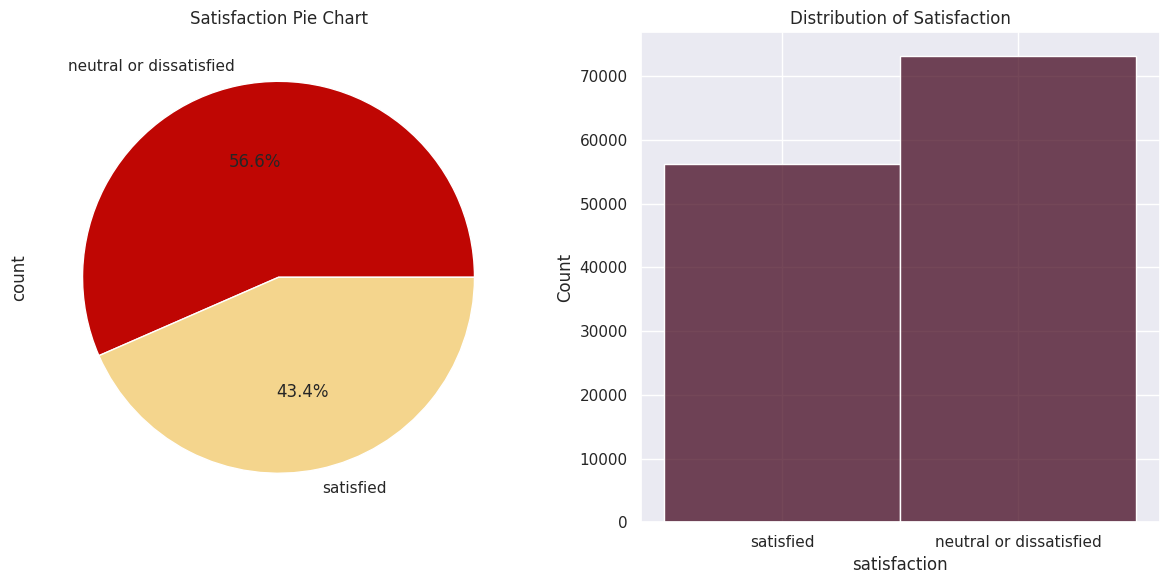

In [301]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(combined_dataset["satisfaction"], ax=axes[1],color="#450920")
axes[1].set_title("Distribution of Satisfaction")
combined_dataset['satisfaction'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%',colors=['#bf0603','#f4d58d'])
axes[0].set_title("Satisfaction Pie Chart")
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

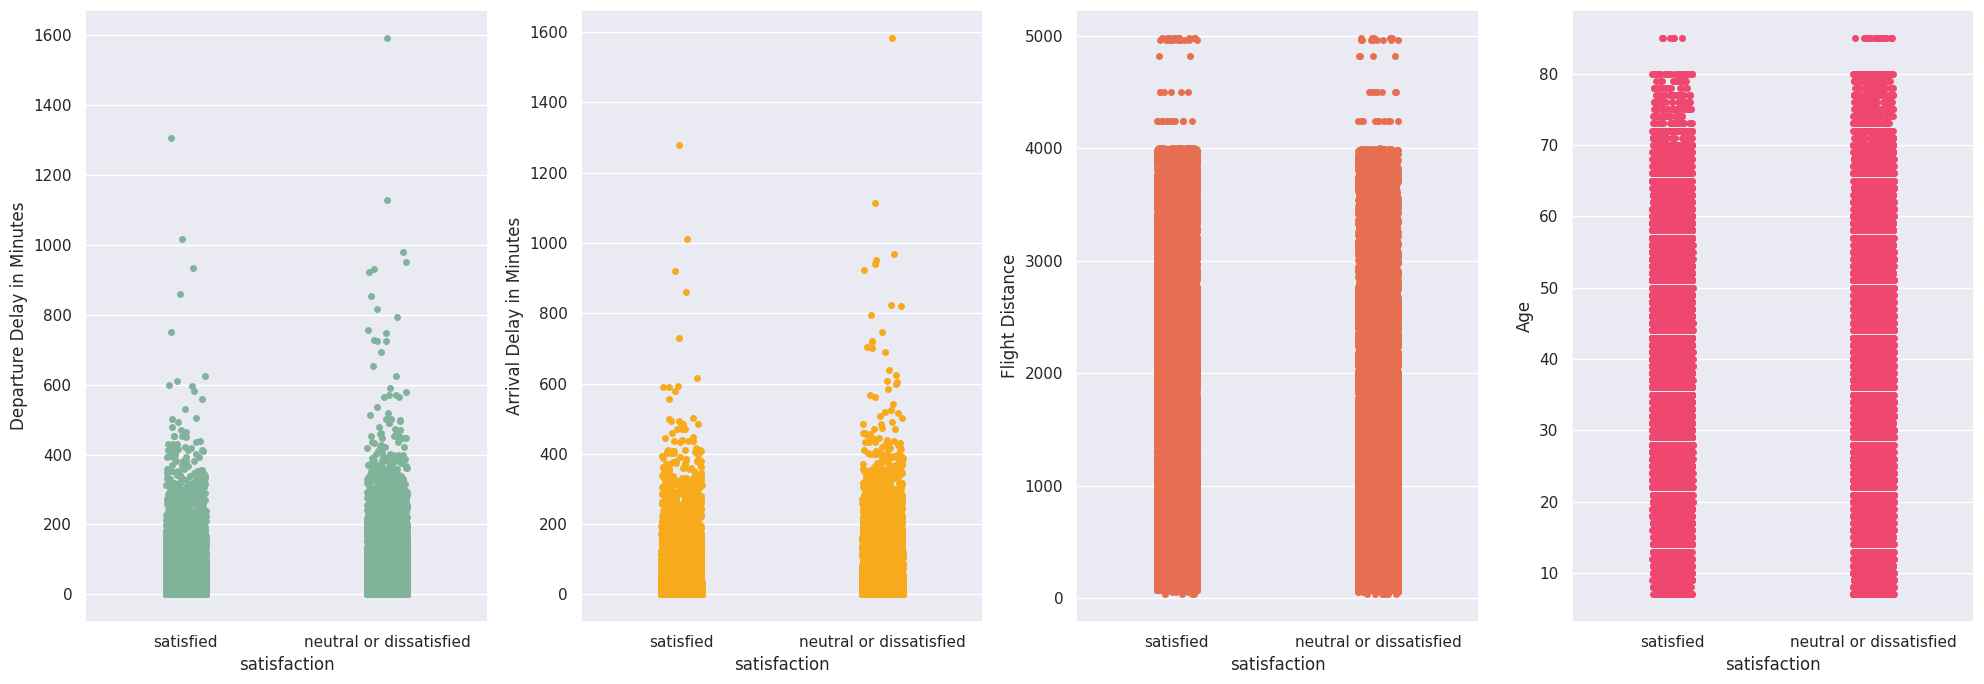

In [302]:

fig, ax = plt.subplots(1, 4, figsize=(20, 7))


sns.stripplot(x="satisfaction", y="Departure Delay in Minutes", data=combined_dataset, ax=ax[0],color='#81b29a',)
sns.stripplot(x="satisfaction", y="Arrival Delay in Minutes", data=combined_dataset, ax=ax[1],color='#f6aa1c',)
sns.stripplot(x="satisfaction", y="Flight Distance", data=combined_dataset, ax=ax[2],color='#e76f51',)
sns.stripplot(x="satisfaction", y="Age", data=combined_dataset, ax=ax[3],color='#ef476f',)


plt.tight_layout()
plt.show()

**# The relation between each categorical class and target feature**

10


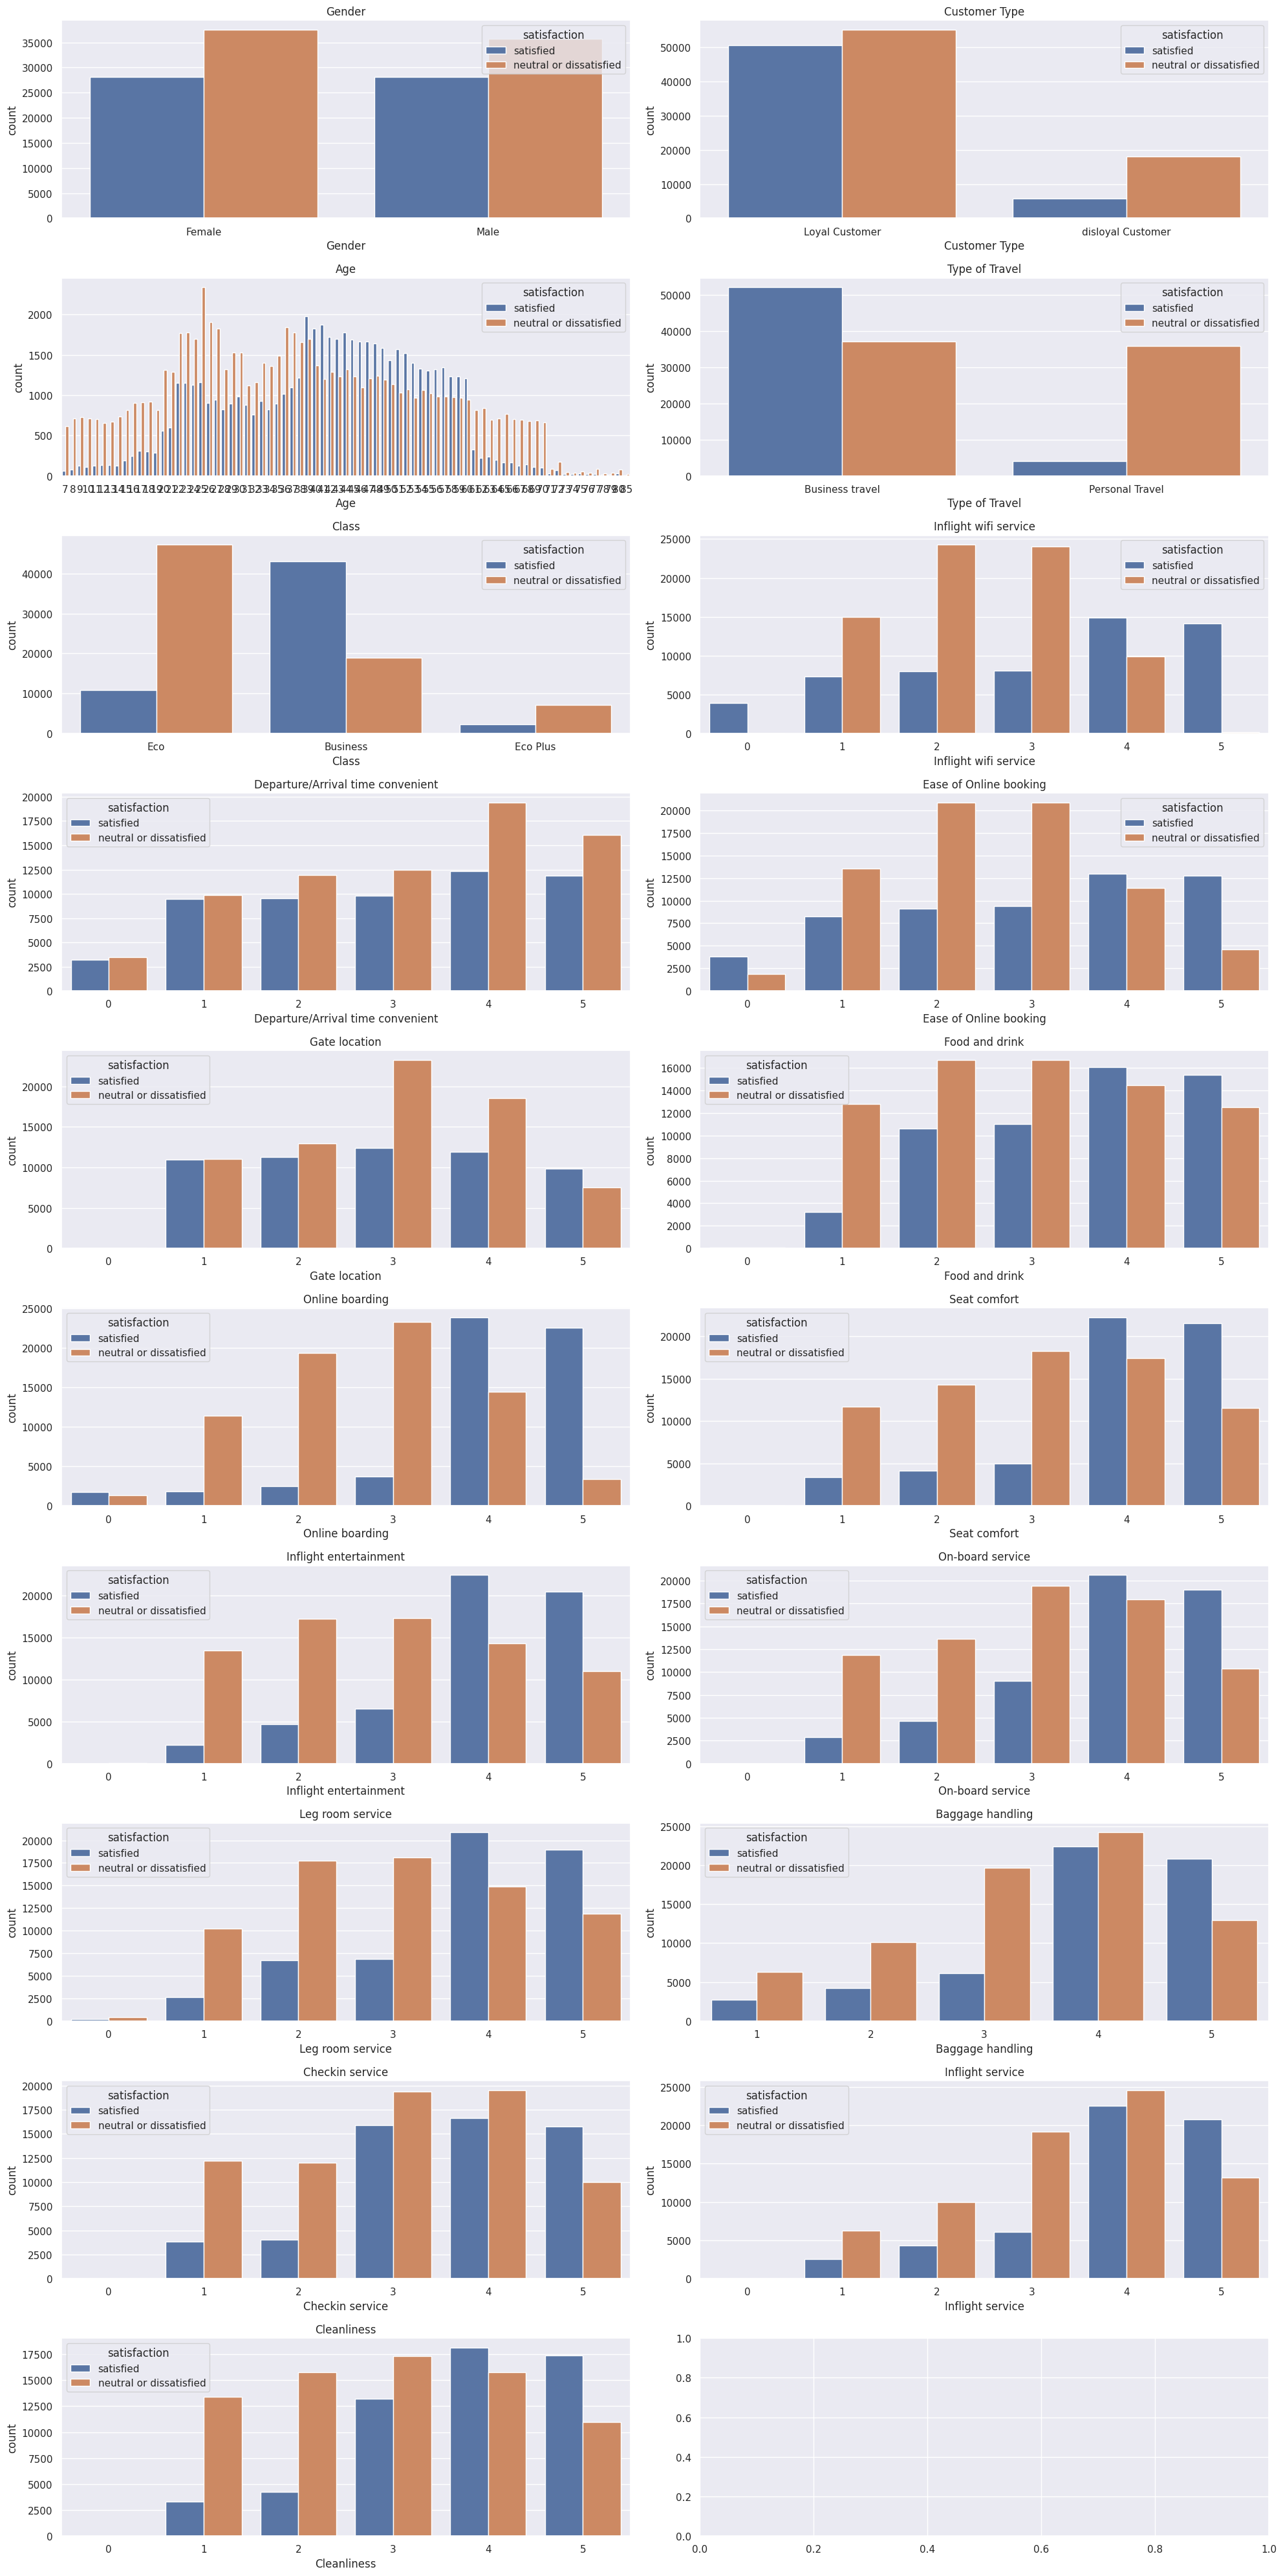

In [303]:
#################################################################
# The relation between each categorical class and target feature#
#################################################################
fig, ax = plt.subplots(10, 2, figsize=(20, 40))

# Flatten the 2D array of axes
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                   'Checkin service', 'Inflight service', 'Cleanliness']

# Plot two columns on each row
print(10)
for i, column in enumerate(columns_to_plot):
    if i < 20:
        sns.countplot(data=combined_dataset, x=column, hue='satisfaction', ax=ax[i])
        ax[i].set_title(column)


plt.tight_layout()
plt.show()

# user is more satisfied in business class and 4, 5 service class and ages [39-60]
#

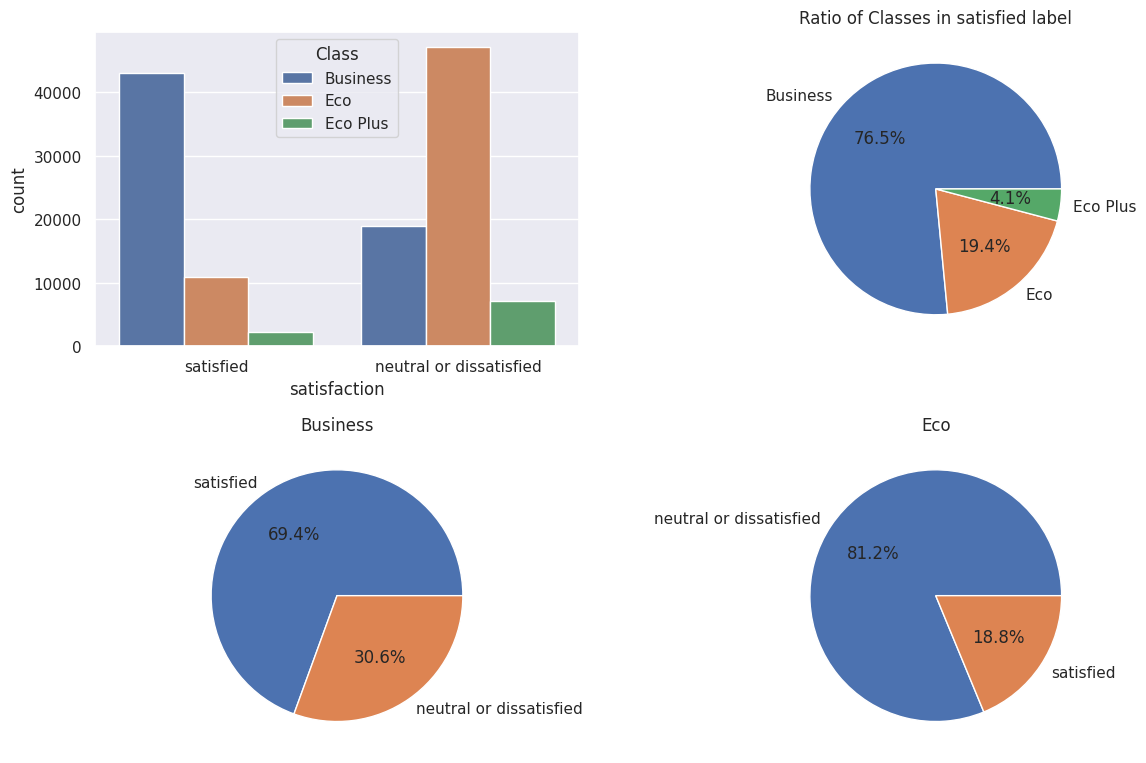

In [304]:
plt.figure(figsize=(30, 20))
plt.subplot(5, 5, 1)
sns.countplot(data=combined_dataset, x='satisfaction', hue='Class', hue_order = ['Business', 'Eco', 'Eco Plus'])
plt.subplot(5, 5, 2)
plt.pie(x = combined_dataset[combined_dataset['satisfaction'] == 'satisfied']['Class'].value_counts(), labels =combined_dataset[combined_dataset['satisfaction'] == 'satisfied']['Class'].value_counts().index  , autopct = '%1.1f%%')
plt.title('Ratio of Classes in satisfied label')
plt.subplot(5, 5, 6)
plt.pie(x = combined_dataset[combined_dataset['Class'] == 'Business']['satisfaction'].value_counts(), labels =combined_dataset[combined_dataset['Class'] == 'Business']['satisfaction'].value_counts().index  , autopct = '%1.1f%%')
plt.title('Business')
plt.subplot(5, 5, 7)
plt.pie(x = combined_dataset[combined_dataset['Class'] == 'Eco']['satisfaction'].value_counts(), labels =combined_dataset[combined_dataset['Class'] == 'Eco']['satisfaction'].value_counts().index  , autopct = '%1.1f%%')
plt.title('Eco')
plt.tight_layout()
plt.show()

****# The relation between 'Class' feature and the Other categorical features

/tmp/ipykernel_34/1540422366.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['5' '1' '2' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = df[column].astype(str)
/tmp/ipykernel_34/1540422366.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '1' '0' ... '1' '1' '3']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = df[column].astype(str)
/tmp/ipykernel_34/1540422366.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3' '3' '2' ... '1' '1' '3']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = df[column].astype(str)
/tmp/ipykernel_34/1540422366.py:19: FutureWarning

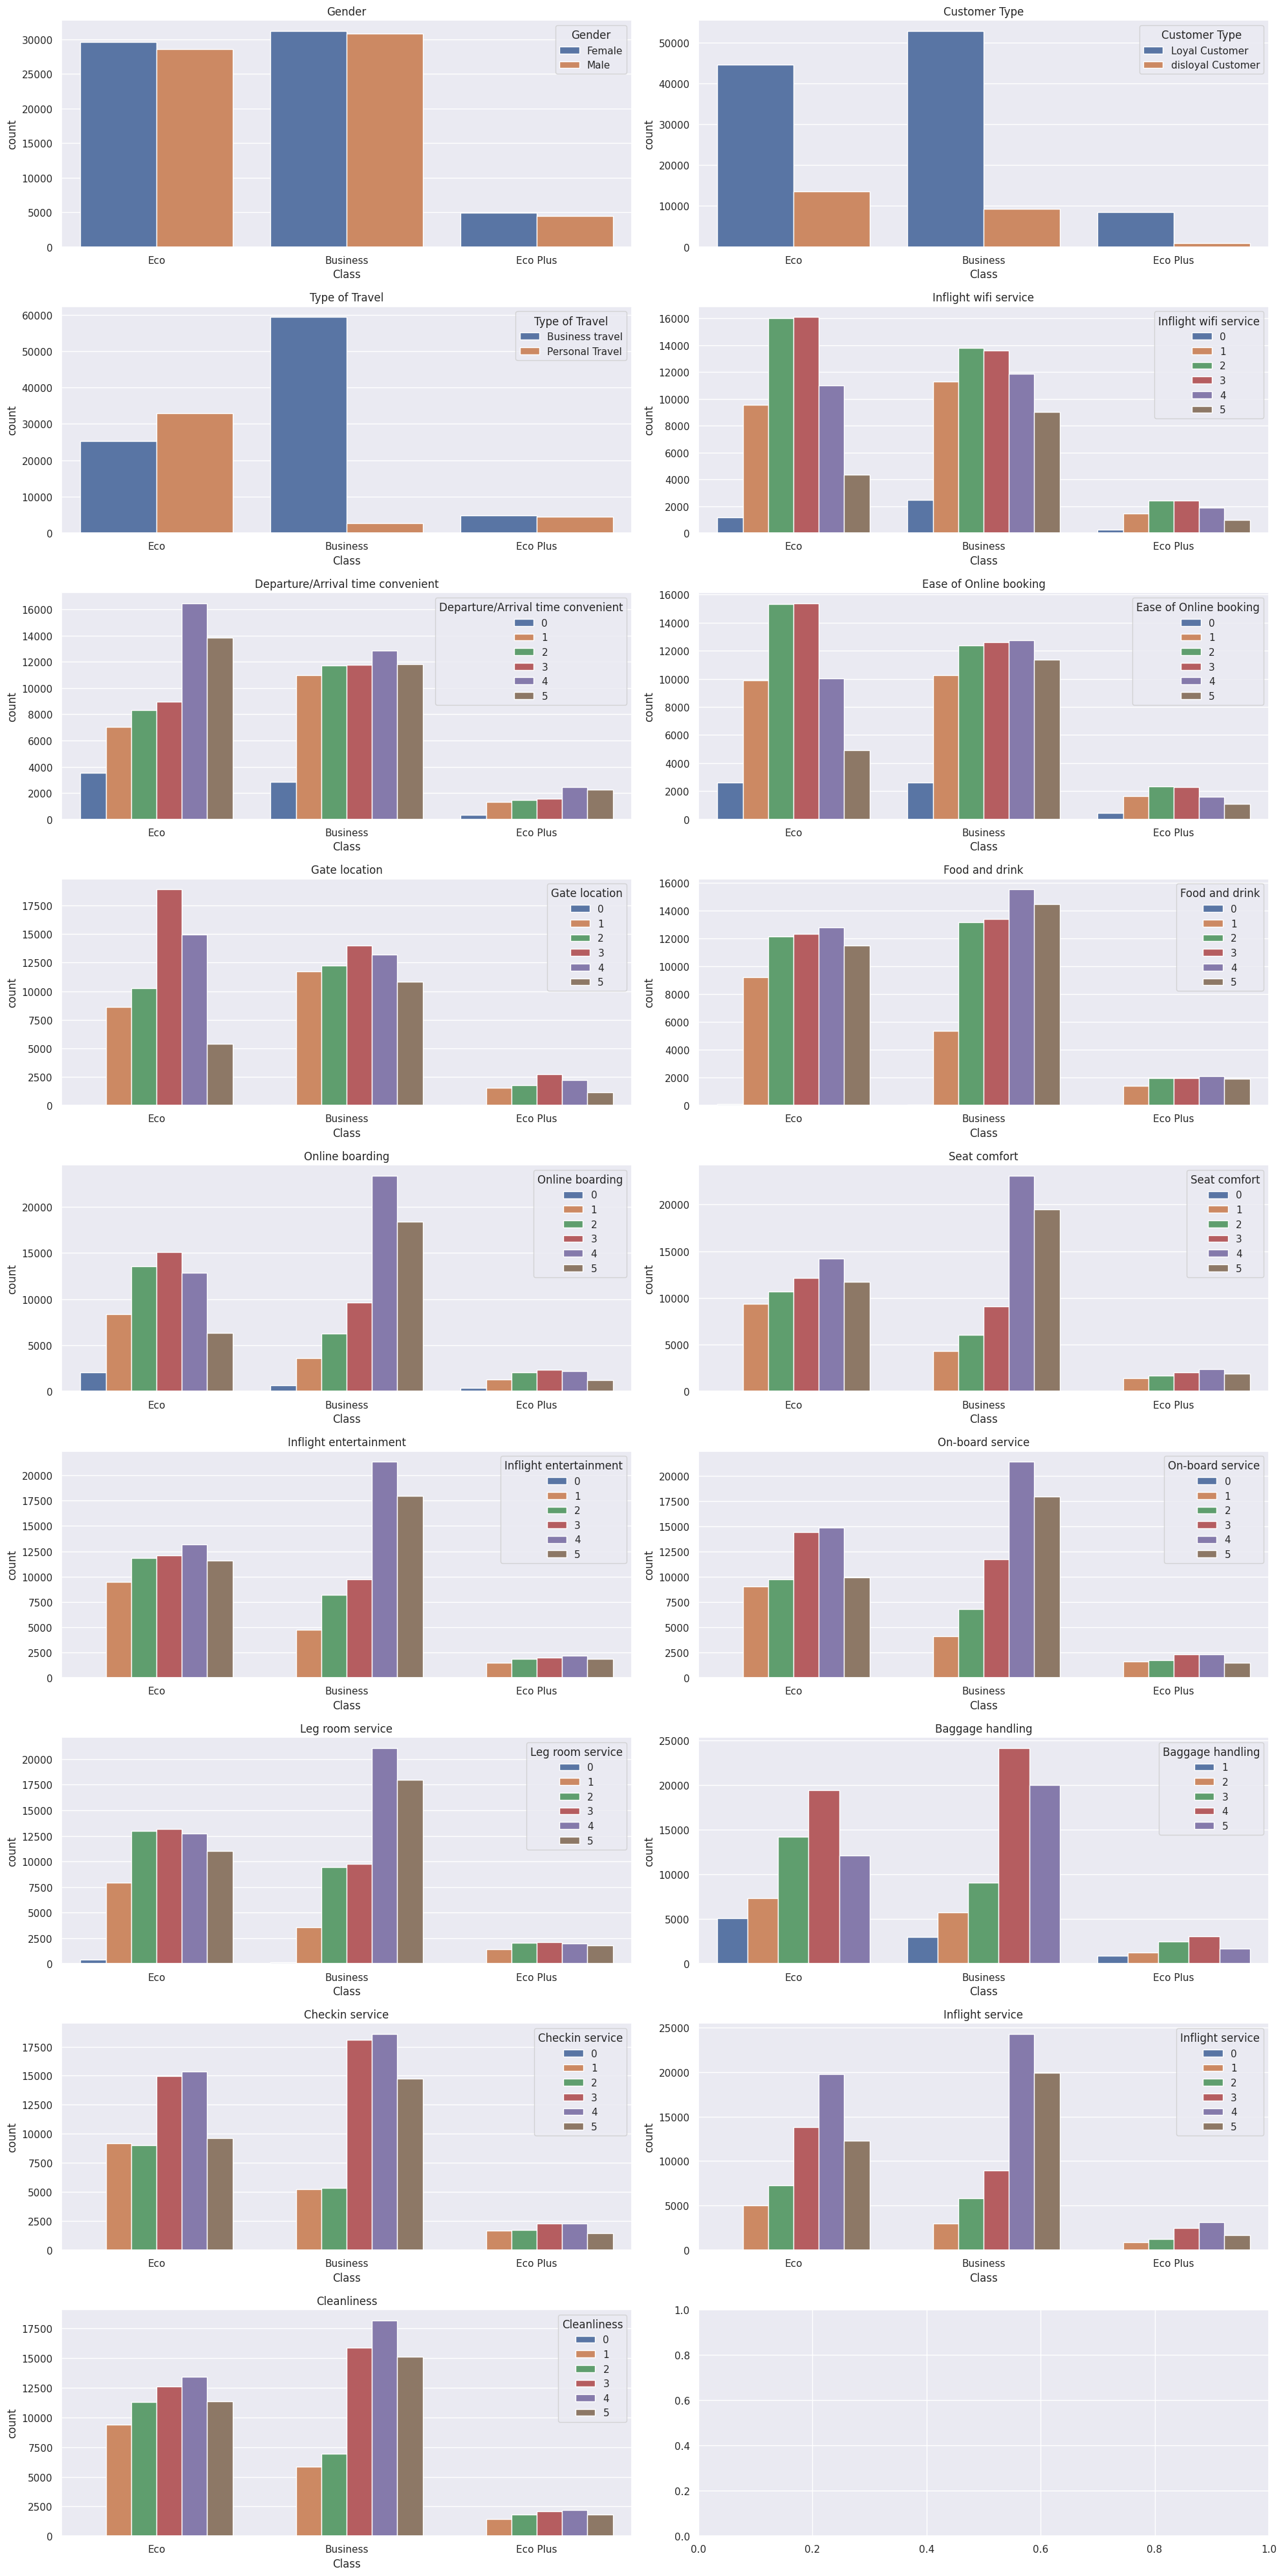

In [305]:
##########################################################################
# The relation between 'Class' feature and the Other categorical features#
##########################################################################

fig, ax = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the 2D array of axes
ax = ax.flatten()
df =  combined_dataset.copy()
# List of columns to plot
columns_to_plot = ['Gender', 'Customer Type', 'Type of Travel',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                   'Checkin service', 'Inflight service', 'Cleanliness']
# Plot two columns on each row
for i, column in enumerate(columns_to_plot):
    if i < 20:
        df.loc[:, column] = df[column].astype(str)
        co = df[column].unique()
        co.sort()
        sns.countplot(data=df, x='Class', hue = column,  ax=ax[i], hue_order = co)
        ax[i].set_title(column)


plt.tight_layout()
plt.show()

# ecoplus class has very low number of participants

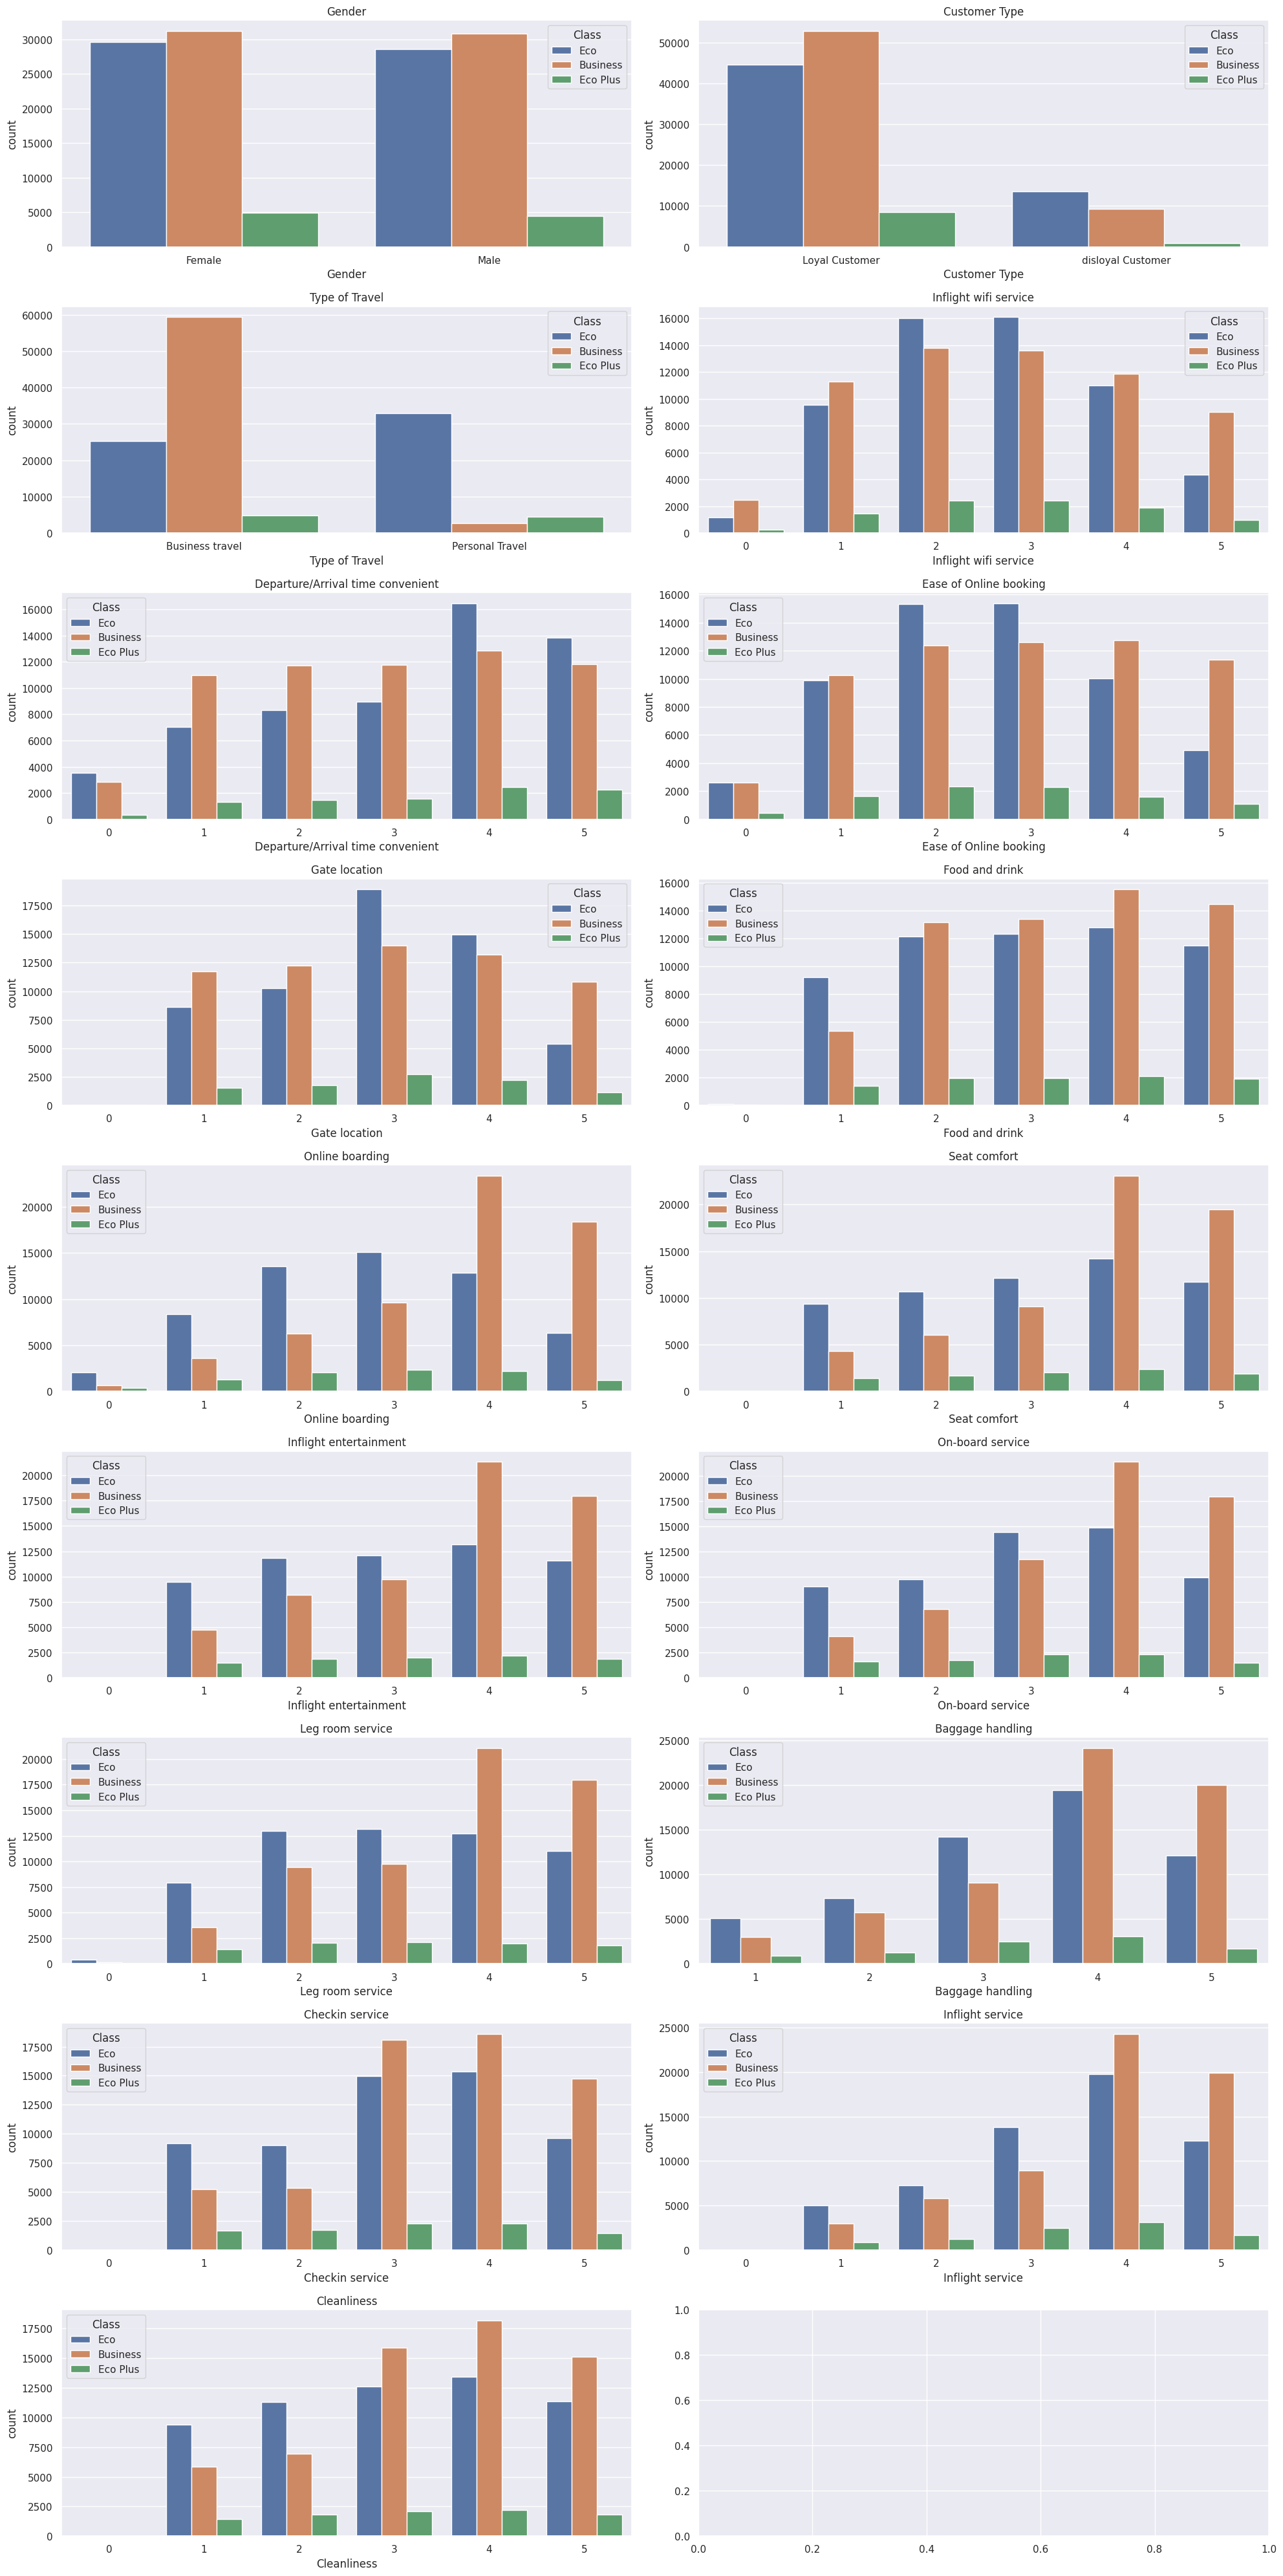

In [306]:
fig, ax = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the 2D array of axes
ax = ax.flatten()

# List of columns to plot
columns_to_plot = ['Gender', 'Customer Type', 'Type of Travel',
                   'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                   'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                   'Checkin service', 'Inflight service', 'Cleanliness']

# Plot two columns on each row
for i, column in enumerate(columns_to_plot):
    if i < 20:

        sns.countplot(data=combined_dataset, x=column, hue = 'Class',  ax=ax[i])
        ax[i].set_title(column)


plt.tight_layout()
plt.show()

# ecoplus class has very low number of participants
# business is more in category 4 and 5

In [309]:
x_combined=combined_dataset.drop("satisfaction",axis=1)
y_combined=combined_dataset["satisfaction"]

In [310]:
x_combined.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [311]:
numerical_variables = ["Age", "Flight Distance",  "Departure Delay in Minutes", "Arrival Delay in Minutes"]

categorical_variables = list(set(x_combined.columns) - set(numerical_variables))

In [312]:
categorical_variables

['Customer Type',
 'Ease of Online booking',
 'Type of Travel',
 'Checkin service',
 'Baggage handling',
 'Inflight service',
 'Gender',
 'Leg room service',
 'Departure/Arrival time convenient',
 'On-board service',
 'Inflight wifi service',
 'Cleanliness',
 'Class',
 'Food and drink',
 'Gate location',
 'Inflight entertainment',
 'Online boarding',
 'Seat comfort']

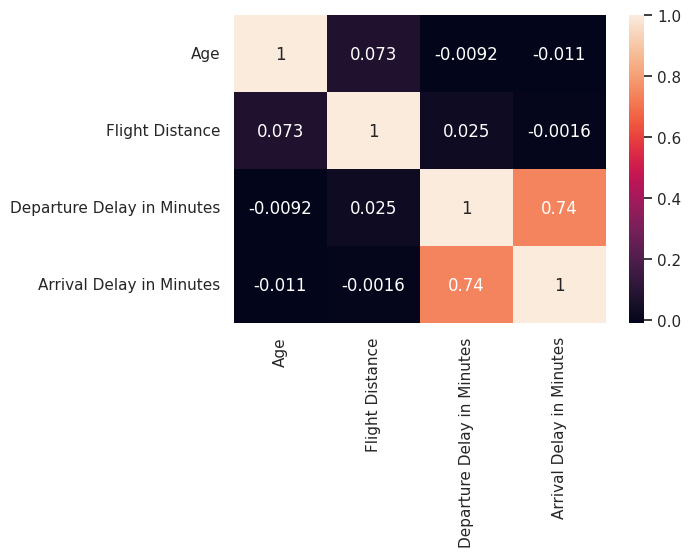

In [313]:
######################################
##relation beteen numerical features##
######################################

correlation_matrix=combined_dataset[numerical_variables].corr(method='spearman')
plt.subplots(figsize=(6,4))
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

In [314]:
x_train,x_test,y_train,y_test=train_test_split(x_combined,y_combined,test_size=0.2,random_state=365,stratify=y_combined)

In [315]:
y_test

93745                  satisfied
28350    neutral or dissatisfied
66675    neutral or dissatisfied
43998    neutral or dissatisfied
95762                  satisfied
                  ...           
99125                  satisfied
62615                  satisfied
14764                  satisfied
45391    neutral or dissatisfied
9635                   satisfied
Name: satisfaction, Length: 25898, dtype: object

**# Label Encoding for target feature and One Hot Encoding for categorical features** 

In [316]:
lb=LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_test

array([1, 0, 0, ..., 1, 0, 1])

In [317]:
dic = {'1': 'satisfied', '0':'neutral or dissatisfied'}
x_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
12103,Male,Loyal Customer,36,Business travel,Business,3801,4,4,4,4,...,1,5,5,5,5,1,5,2,0,0.0
6645,Female,disloyal Customer,17,Business travel,Business,882,0,5,0,4,...,2,2,4,2,4,5,4,2,0,0.0
37363,Female,Loyal Customer,51,Business travel,Business,2642,4,4,5,4,...,4,4,4,5,4,4,4,5,70,63.0
68672,Male,Loyal Customer,48,Business travel,Eco,2342,3,2,4,4,...,3,3,1,3,3,4,4,3,12,4.0
1059,Female,Loyal Customer,47,Business travel,Business,414,1,1,1,1,...,4,4,4,4,4,5,4,4,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88465,Male,Loyal Customer,21,Personal Travel,Eco,836,2,4,2,1,...,5,3,3,4,4,4,4,3,18,0.0
69081,Female,disloyal Customer,18,Business travel,Eco,530,0,2,0,4,...,5,3,5,2,5,5,5,3,5,4.0
69089,Female,Loyal Customer,46,Business travel,Eco Plus,1846,2,4,4,4,...,3,2,2,2,2,2,2,3,1,28.0
45236,Male,Loyal Customer,48,Business travel,Business,1023,1,1,1,1,...,4,5,5,5,5,5,5,5,61,49.0


In [318]:
onh=OneHotEncoder(cols=categorical_variables,use_cat_names=True)
x_train=onh.fit_transform(x_train)
x_test=onh.transform(x_test)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

In [320]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25898 entries, 93745 to 9635
Data columns (total 93 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_Male                            25898 non-null  int64  
 1   Gender_Female                          25898 non-null  int64  
 2   Customer Type_Loyal Customer           25898 non-null  int64  
 3   Customer Type_disloyal Customer        25898 non-null  int64  
 4   Age                                    25898 non-null  int64  
 5   Type of Travel_Business travel         25898 non-null  int64  
 6   Type of Travel_Personal Travel         25898 non-null  int64  
 7   Class_Business                         25898 non-null  int64  
 8   Class_Eco                              25898 non-null  int64  
 9   Class_Eco Plus                         25898 non-null  int64  
 10  Flight Distance                        25898 non-null  int64  
 11  Infl

In [321]:
x_train.drop(labels=['Gender_Male','Customer Type_Loyal Customer', 'Type of Travel_Personal Travel'], axis=1,inplace=True)
x_test.drop(labels=['Gender_Male','Customer Type_Loyal Customer', 'Type of Travel_Personal Travel'], axis=1,inplace=True)

In [322]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25898 entries, 93745 to 9635
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender_Female                          25898 non-null  int64  
 1   Customer Type_disloyal Customer        25898 non-null  int64  
 2   Age                                    25898 non-null  int64  
 3   Type of Travel_Business travel         25898 non-null  int64  
 4   Class_Business                         25898 non-null  int64  
 5   Class_Eco                              25898 non-null  int64  
 6   Class_Eco Plus                         25898 non-null  int64  
 7   Flight Distance                        25898 non-null  int64  
 8   Inflight wifi service_4.0              25898 non-null  int64  
 9   Inflight wifi service_0.0              25898 non-null  int64  
 10  Inflight wifi service_3.0              25898 non-null  int64  
 11  Infl

In [323]:
transformer = MinMaxScaler()
def scaling_train(numerical_variables):
    return transformer.fit_transform(x_train[numerical_variables].values.reshape(-1,1) )
def scaling_test(numerical_variables):
    return transformer.transform(x_test[numerical_variables].values.reshape(-1,1) )
for i  in numerical_variables:
    x_train[i]=scaling_train(i)
    x_test[i]=scaling_test(i)

x_train.head()


,Gender_Female,Customer Type_disloyal Customer,Age,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance,Inflight wifi service_4.0,Inflight wifi service_0.0,...,Inflight service_3.0,Inflight service_0.0,Cleanliness_2.0,Cleanliness_5.0,Cleanliness_3.0,Cleanliness_4.0,Cleanliness_1.0,Cleanliness_0.0,Departure Delay in Minutes,Arrival Delay in Minutes
12103,0,0,0.371795,1,1,0,0,0.761309,1,0,...,0,0,1,0,0,0,0,0,0.000000,0.000000
6645,1,1,0.128205,1,1,0,0,0.171850,0,1,...,0,0,1,0,0,0,0,0,0.000000,0.000000
37363,1,0,0.564103,1,1,0,0,0.527262,1,0,...,0,0,0,1,0,0,0,0,0.043970,0.039773
68672,0,0,0.525641,1,0,1,0,0.466680,0,0,...,0,0,0,0,1,0,0,0,0.007538,0.002525
1059,1,0,0.512821,1,1,0,0,0.077342,0,0,...,0,0,0,0,0,1,0,0,0.001884,0.001263


In [324]:
x_test.head()

,Gender_Female,Customer Type_disloyal Customer,Age,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance,Inflight wifi service_4.0,Inflight wifi service_0.0,...,Inflight service_3.0,Inflight service_0.0,Cleanliness_2.0,Cleanliness_5.0,Cleanliness_3.0,Cleanliness_4.0,Cleanliness_1.0,Cleanliness_0.0,Departure Delay in Minutes,Arrival Delay in Minutes
93745,0,0,0.500000,1,1,0,0,0.316034,1,0,...,0,0,0,0,1,0,0,0,0.001256,0.001894
28350,1,0,0.423077,1,1,0,0,0.014136,0,0,...,1,0,0,0,0,0,1,0,0.000000,0.000000
66675,1,0,0.692308,0,0,0,1,0.235864,0,0,...,1,0,0,0,0,0,1,0,0.003769,0.000000
43998,0,0,0.153846,0,0,1,0,0.167811,0,0,...,0,0,0,0,0,1,0,0,0.000000,0.000000
95762,1,0,0.423077,1,1,0,0,0.543215,0,0,...,0,0,0,0,1,0,0,0,0.001884,0.000000


In [325]:
y_test

array([1, 0, 0, ..., 1, 0, 1])

# Modeling

In [ ]:
# @title SGD

**With Train-Test Split**

In [326]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_sgd_pre=sgd.predict(x_test)

In [327]:
print(classification_report(y_test,y_sgd_pre))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14645
           1       0.93      0.91      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



In [328]:
print ('accuracy_score for testing on sgd is : ',accuracy_score(y_test,y_sgd_pre) )
print ('precision_score for testing on sgd is : ',precision_score(y_test,y_sgd_pre) )
print ('f1_score for testing on knn is :sgd',f1_score(y_test,y_sgd_pre))

accuracy_score for testing on sgd is :  0.9328519576801297
precision_score for testing on sgd is :  0.9308876811594203
f1_score for testing on knn is :sgd 0.921993450859014


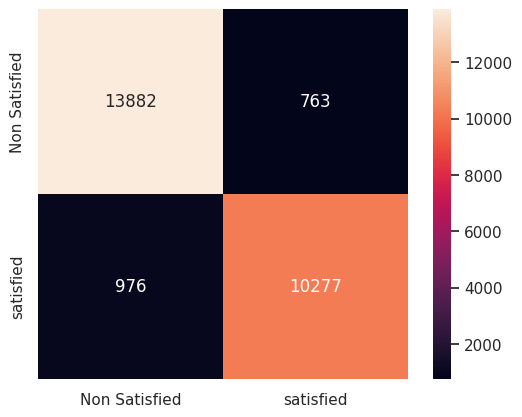

In [352]:
Y_test = [dic[str(i)] for i in y_test]
Y_sgd_pre = [dic[str(i)] for i in y_sgd_pre ]
confusion_matrix_sgd=confusion_matrix(Y_test,Y_sgd_pre)
sns.heatmap(confusion_matrix_sgd,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**With KFold **

In [354]:
from sklearn.model_selection import KFold
x_combined = pd.concat([x_train, x_test], axis = 0)
y_combined = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(sgd, x_combined, y_combined, cv=k_fold)

In [355]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
from sklearn.model_selection import KFold
x_combined = pd.concat([x_train, x_test], axis = 0)
y_combined = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(sgd, x_combined, y_combined, cv=k_fold, scoring=scoring)
# scores = cross_val_score(sgd, x_combined, y_combined, cv=k_fold,scoring =scoring)
cv_results

{'fit_time': array([0.66033697, 0.72526646, 0.69604802, 0.80296898, 0.70587087]),
 'score_time': array([0.03725195, 0.03485727, 0.03454185, 0.05540609, 0.08084774]),
 'test_accuracy': array([0.93513013, 0.93374006, 0.93288798, 0.9345484 , 0.9313434 ]),
 'test_precision': array([0.93442474, 0.94105028, 0.93951839, 0.9351003 , 0.92243646]),
 'test_recall': array([0.91462655, 0.9029804 , 0.90229473, 0.91313597, 0.92179016]),
 'test_f1_score': array([0.92441965, 0.92162236, 0.92053041, 0.92398762, 0.92211319])}

In [356]:
print("Cross-validation scores:", scores)

Cross-validation scores: [0.93613406 0.93555487 0.93126617 0.93443256 0.93304244]


# KNN classifier

**Train-Test Split**

In [357]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_knn_pre=knn.predict(x_test)

In [358]:
print(classification_report(y_test,y_knn_pre))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14645
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



In [360]:
print ('accuracy_score for testing on knn is : ',accuracy_score(y_test,y_knn_pre) )
print ('precision_score for testing on knn is : ',precision_score(y_test,y_knn_pre) )
print ('f1_score for testing on knn is : ',f1_score(y_test,y_knn_pre))

accuracy_score for testing on knn is :  0.9404973357015985
precision_score for testing on knn is :  0.9429848567779602
f1_score for testing on knn is :  0.9306324555480531


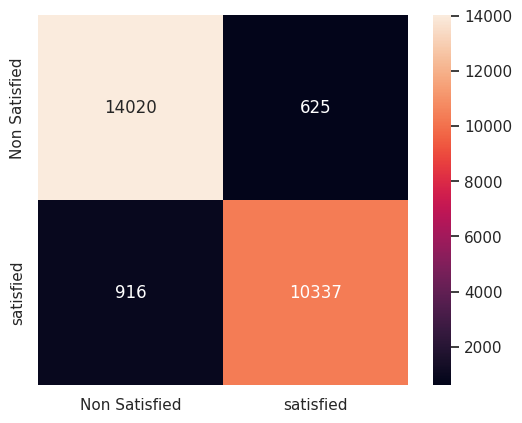

In [365]:
confusion_matrix_knn=confusion_matrix(y_test,y_knn_pre)
sns.heatmap(confusion_matrix_knn,annot=True,square=True,fmt='1',  xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [366]:
cv_results = cross_validate(knn, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

{'fit_time': array([0.10894918, 0.11125731, 0.10500526, 0.10417151, 0.10146952]),
 'score_time': array([9.39819336, 9.72651005, 9.18111777, 9.20017076, 9.82112002]),
 'test_accuracy': array([0.94347054, 0.94370222, 0.94018612, 0.9393366 , 0.93968413]),
 'test_precision': array([0.9448948 , 0.94617434, 0.94235197, 0.94403292, 0.94476534]),
 'test_recall': array([0.92352889, 0.92195471, 0.91726425, 0.91499734, 0.91679804]),
 'test_f1_score': array([0.93408968, 0.93390752, 0.92963888, 0.92928838, 0.93057161])}

# Naive bayes classifier

**Train-Test Split**

In [367]:
#from operator import mul
nv=MultinomialNB()
nv.fit(x_train,y_train)
y_nv_pre=nv.predict(x_test)

In [368]:
print(classification_report(y_test,y_nv_pre))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     14645
           1       0.84      0.86      0.85     11253

    accuracy                           0.87     25898
   macro avg       0.86      0.87      0.86     25898
weighted avg       0.87      0.87      0.87     25898



In [369]:

print ('accuracy_score for testing on nv is : ',accuracy_score(y_test,y_nv_pre) )
print ('precision_score for testing on nv is : ',precision_score(y_test,y_nv_pre) )
print ('f1_score for testing on nv is : ',f1_score(y_test,y_nv_pre))

accuracy_score for testing on nv is :  0.8665920148273998
precision_score for testing on nv is :  0.8365849447513812
f1_score for testing on nv is :  0.848710426062968


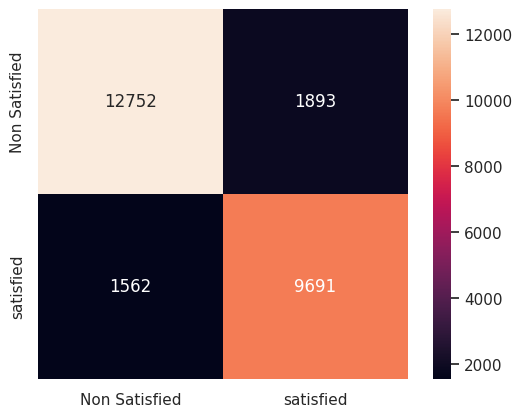

In [371]:
confusion_matrix_nv=confusion_matrix(y_test,y_nv_pre)
sns.heatmap(confusion_matrix_nv,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [372]:
cv_results = cross_validate(nv, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

{'fit_time': array([0.08726645, 0.12776613, 0.1425693 , 0.12785792, 0.11987519]),
 'score_time': array([0.04605198, 0.0445559 , 0.0424192 , 0.06618714, 0.07587361]),
 'test_accuracy': array([0.86844544, 0.87110974, 0.86901958, 0.86809283, 0.86844036]),
 'test_precision': array([0.83645744, 0.84127537, 0.83715477, 0.84010723, 0.83959305]),
 'test_recall': array([0.86601976, 0.86431576, 0.86401936, 0.86110619, 0.86731477]),
 'test_f1_score': array([0.85098194, 0.85263994, 0.85037494, 0.85047711, 0.85322879])}

# Decision tree classifier

**Train-Test Split**

In [373]:
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
y_ds_pre=ds.predict(x_test)

In [374]:
print(classification_report(y_test,y_ds_pre))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14645
           1       0.94      0.94      0.94     11253

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



In [377]:
print ('accuracy_score for testing on ds is : ',accuracy_score(y_test,y_ds_pre) )
print ('precision_score for testing on ds is : ',precision_score(y_test,y_ds_pre) )
print ('f1_score for testing on ds is : ',f1_score(y_test,y_ds_pre))


accuracy_score for testing on ds is :  0.9489922001698973
precision_score for testing on ds is :  0.9385376192158248
f1_score for testing on ds is :  0.941489126101785


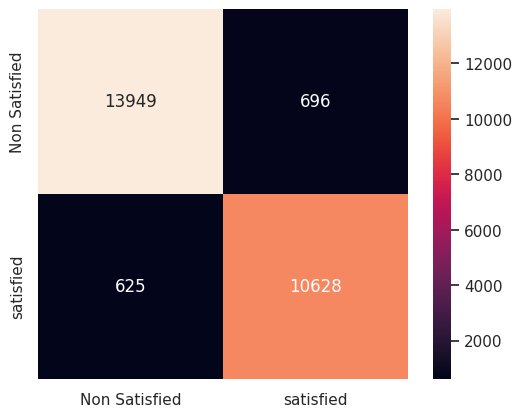

In [380]:
confusion_matrix_ds=confusion_matrix(y_test,y_ds_pre)
sns.heatmap(confusion_matrix_ds,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [381]:
cv_results = cross_validate(ds, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

{'fit_time': array([1.49835467, 1.49762297, 1.49519992, 1.55029511, 1.58464622]),
 'score_time': array([0.02932882, 0.02481008, 0.02687526, 0.03629518, 0.02569556]),
 'test_accuracy': array([0.94906943, 0.9481041 , 0.94566938, 0.94825655, 0.94698228]),
 'test_precision': array([0.93890561, 0.93572125, 0.93433128, 0.9399115 , 0.93914488]),
 'test_recall': array([0.94400427, 0.94459859, 0.93994263, 0.9414111 , 0.94070765]),
 'test_f1_score': array([0.94144804, 0.94013896, 0.93712856, 0.9406607 , 0.93992562])}

# Random forest classifier

**Train-Test Split**

In [382]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pre=rf.predict(x_test)

In [384]:
print(classification_report(y_test,y_rf_pre))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14645
           1       0.97      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [385]:
print ('accuracy_score for testing on rf is : ',accuracy_score(y_test,y_rf_pre) )
print ('precision_score for testing on rf is : ',precision_score(y_test,y_rf_pre) )
print ('f1_score for testing on rf is : ',f1_score(y_test,y_rf_pre))


accuracy_score for testing on rf is :  0.9610780755270677
precision_score for testing on rf is :  0.9712078005703247
f1_score for testing on rf is :  0.9544386186946302


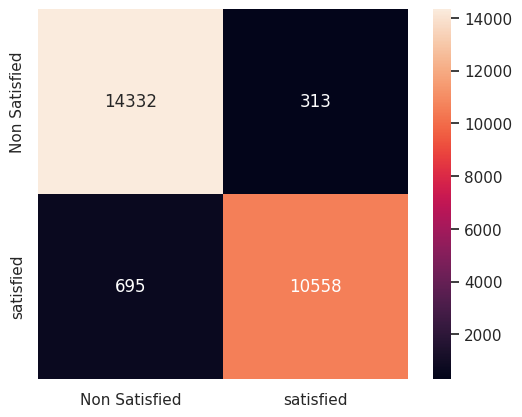

In [387]:
confusion_matrix_rf=confusion_matrix(y_test,y_rf_pre)
sns.heatmap(confusion_matrix_rf,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [388]:
cv_results = cross_validate(rf, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

{'fit_time': array([15.31110835, 15.55424309, 15.59984112, 15.93627119, 16.14811945]),
 'score_time': array([0.47406316, 0.49438095, 0.49349427, 0.50627112, 0.50460148]),
 'test_accuracy': array([0.96273844, 0.96219785, 0.96003398, 0.9600726 , 0.96018844]),
 'test_precision': array([0.97387853, 0.97203186, 0.97140196, 0.97295551, 0.97303944]),
 'test_recall': array([0.93928603, 0.9394075 , 0.93474364, 0.93432016, 0.93562796]),
 'test_f1_score': array([0.95626954, 0.95544126, 0.9527203 , 0.95324652, 0.95396705])}

# Logistic regression

**Train_Test Split**

In [389]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pre=lr.predict(x_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [390]:
print(classification_report(y_test,y_lr_pre))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14645
           1       0.93      0.91      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



In [391]:
print ('accuracy_score for testing on logistic regression is : ',accuracy_score(y_test,y_lr_pre) )
print ('precision_score for testing on logistic regression is : ',precision_score(y_test,y_lr_pre) )
print ('f1_score for testing on logistic regression is : ',f1_score(y_test,y_lr_pre))


accuracy_score for testing on logistic regression is :  0.9328133446598192
precision_score for testing on logistic regression is :  0.9313503219370636
f1_score for testing on logistic regression is :  0.921903052064632


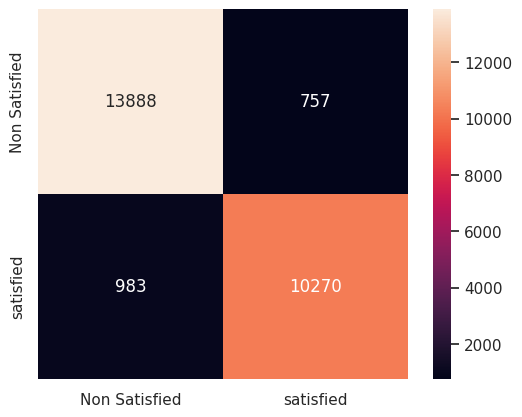

In [392]:
confusion_matrix_lr=confusion_matrix(y_test,y_lr_pre)
sns.heatmap(confusion_matrix_lr,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [393]:
cv_results = cross_validate(lr, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'fit_time': array([2.1868062 , 2.17215729, 2.95684719, 1.97328544, 2.20332384]),
 'score_time': array([0.04324603, 0.04143167, 0.04118538, 0.06307101, 0.07302928]),
 'test_accuracy': array([0.93601823, 0.93655881, 0.93076418, 0.93335135, 0.93157509]),
 'test_precision': array([0.93369565, 0.93428728, 0.92898378, 0.93365402, 0.93201362]),
 'test_recall': array([0.91765334, 0.91747964, 0.90874866, 0.91180642, 0.91128043]),
 'test_f1_score': array([0.92560499, 0.92580718, 0.91875481, 0.9226009 , 0.92153042])}

# SVM classifier

**Train_Test Split**

In [394]:
svc=LinearSVC()
svc.fit(x_train,y_train)
y_svm_pre=svc.predict(x_test)

In [395]:
print(classification_report(y_test,y_svm_pre))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14645
           1       0.93      0.91      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



In [396]:
print ('accuracy_score for testing on svm is : ',accuracy_score(y_test,y_svm_pre) )
print ('precision_score for testing on svm is : ',precision_score(y_test,y_svm_pre) )
print ('f1_score for testing on svm is : ',f1_score(y_test,y_svm_pre))


accuracy_score for testing on svm is :  0.9327747316395089
precision_score for testing on svm is :  0.9317356572258533
f1_score for testing on svm is :  0.9218195698055593


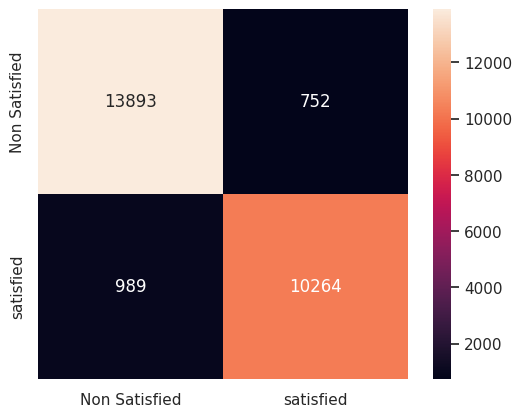

In [397]:
confusion_matrix_svm=confusion_matrix(y_test,y_svm_pre)
sns.heatmap(confusion_matrix_svm,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [398]:
cv_results = cross_validate(svc, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

{'fit_time': array([3.90285945, 4.08510375, 3.8091898 , 3.9059608 , 3.87184906]),
 'score_time': array([0.03446436, 0.03388309, 0.03357053, 0.05863333, 0.06643772]),
 'test_accuracy': array([0.9353618 , 0.93520735, 0.93095725, 0.93327412, 0.93176816]),
 'test_precision': array([0.93335751, 0.93288958, 0.92964594, 0.93450973, 0.93367484]),
 'test_recall': array([0.91640702, 0.91568961, 0.90847974, 0.91065414, 0.90987914]),
 'test_f1_score': array([0.9248046 , 0.92420958, 0.91894097, 0.92242772, 0.92162342])}

# Principal Component Analysis

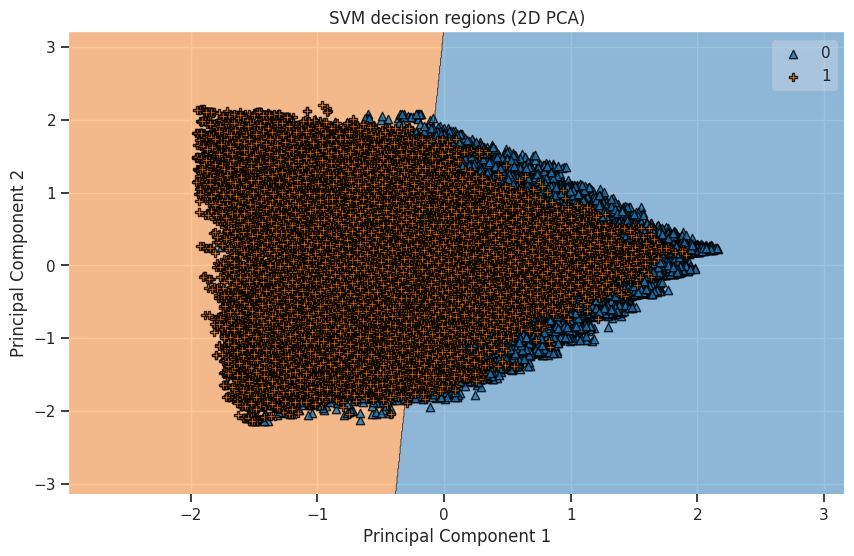

In [399]:
from sklearn.decomposition import PCA
# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time


# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
# Train your LinearSVC model on the reduced-dimensional data
svc.fit(X_train_pca, y_train)
# Visualize decision regions in 2D
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_train_pca, y=y_train, clf=svc, markers=['^', 'P'])
plt.title('SVM decision regions (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [400]:
svc2=SVC(kernel='poly')
svc2.fit(x_train,y_train)
y_svc2_pre=svc2.predict(x_test)

In [401]:
print(classification_report(y_test,y_svc2_pre))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [402]:
print ('accuracy_score for testing on poly svm is : ',accuracy_score(y_test,y_svc2_pre) )
print ('precision_score for testing on poly svm is : ',precision_score(y_test,y_svc2_pre) )
print ('f1_score for testing on poly svm is : ',f1_score(y_test,y_svc2_pre))


accuracy_score for testing on poly svm is :  0.9637037609081782
precision_score for testing on poly svm is :  0.9731167997063951
f1_score for testing on poly svm is :  0.9575659082701335


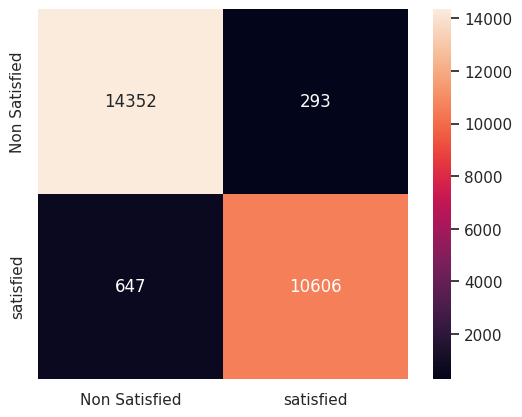

In [403]:
confusion_matrix_svm=confusion_matrix(y_test,y_svc2_pre)
sns.heatmap(confusion_matrix_svm,annot=True,square=True,fmt='1', xticklabels = ['Non Satisfied','satisfied' ], yticklabels = ['Non Satisfied', 'satisfied'])
plt.show()

**KFold**

In [ ]:
cv_results = cross_validate(svc2, x_combined, y_combined, cv=k_fold, scoring=scoring)
cv_results

In [ ]:
# Reduce dimensionality to 2 dimensions using PCA
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(x_train)
# Train your LinearSVC model on the reduced-dimensional data
svc2.fit(X_train_pca, y_train)
# Visualize decision regions in 2D
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_train_pca, y=y_train.to_numpy(), clf=svc2, markers=['^', 'P'])
plt.title('SVM decision regions (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
tuned_parameters=[
    {"kernel":["linear"], "C":[1,5]},
    {"kernel":["poly"], "C":[1,5]},
    {"kernel":["rbf"],"gamma":[1e-3,1e-4], "C":[1,5]}
]

scores=["precision","recall"]

In [ ]:
for score in scores:

    print("# Tuning hyper-parameters for %s\n\n" % score)
    clf=GridSearchCV(svm.SVC(),tuned_parameters,scoring="%s_macro" %score,cv=5,n_jobs=-1)#{}_macro  This means that the metric will be calculated independently for each class and then averaged.
    clf.fit(x_train,y_train)

    print("Best parameters set found on development set:\n\n",clf.best_params_)
    print("Grid scores on development set:\n\n")
    means=clf.cv_results_["mean_test_score"]
    stds=clf.cv_results_["std_test_score"]
    for mean,std,params in zip(means,stds,clf.cv_results_["params"]):
        print("%0.3f %0.3f %r" %(mean,std*2,params))#The %0.3f, %0.03f, and %r are format specifiers for floating-point numbers and strings

    print("Detailed classification report:\n\n")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true,y_pred=y_test,clf.predict(x_test)
    print(classification_report(y_true,y_pred))
